In [1]:
# Load pandas library
import pandas as pd

# Load matpoltlib library
import matplotlib.pyplot as plt

# Load numpy library
import numpy as np

In [2]:
# Read data from weekdays file
weekdays = pd.read_csv("weekdays.csv", names=['did', 'day_of_week'], na_values = ['no info', '.'])

# check first few rows
# weekdays.head(7)

# check datatypes
# print(weekdays['did'].dtypes)
# print(weekdays['week'].dtypes)


# Read data from months files
months = pd.read_csv("months.csv", names=['mid', 'month'], na_values = ['no info', '.'])

# check first few rows
# months.head(12)

# check datatypes
# print(months['mid'].dtypes)
# print(months['month'].dtypes)


# Read data from carriers files
carriers = pd.read_csv("carriers.csv", names=['cid', 'name'], na_values = ['no info', '.'])

# check first few rows
# carriers.head(5)

# check datatypes
# print(carriers['cid'].dtypes)
# print(carriers['name'].dtypes)


# Read data from flights files
flights = pd.read_csv("flights-small.csv", names=['fid', 'month_id', 'day_of_month', 'day_of_week_id', 
                                                  'carrier_id', 'flight_num', 'origin_city', 'origin_state', 
                                                  'dest_city', 'dest_state', 'departure_delay', 'taxi_out', 
                                                  'arrival_delay', 'canceled', 'actual_time', 'distance', 
                                                  'capacity', 'price', ], na_values = ['no info', '.'])

# check first few rows
# flights.head(5)

# check datatypes
# print(flights['fid'].dtypes)
# print(flights['month_id'].dtypes)
# print(flights['day_of_month'].dtypes)
# print(flights['day_of_week_id'].dtypes)
# print(flights['carrier_id'].dtypes)
# print(flights['flight_num'].dtypes)
# print(flights['origin_city'].dtypes)
# print(flights['origin_state'].dtypes)
# print(flights['dest_city'].dtypes)
# print(flights['dest_state'].dtypes)
# print(flights['departure_delay'].dtypes)
# print(flights['taxi_out'].dtypes)
# print(flights['arrival_delay'].dtypes)
# print(flights['canceled'].dtypes)
# print(flights['actual_time'].dtypes)
# print(flights['distance'].dtypes)
# print(flights['capacity'].dtypes)
# print(flights['price'].dtypes)

In [3]:
# filter down flights to those between Seattle and New York City
sea_ny = flights[(flights.origin_city.isin(['Seattle WA', 'New York NY'])) 
                 & (flights.dest_city.isin(['Seattle WA', 'New York NY']))]

# Join carriers name from carriers table to carrier_id in sea_ny flights table
carriers_1 = sea_ny.merge(carriers[['cid', 'name']], left_on='carrier_id', right_on='cid', how='left')

# Create aggregation of flights by Airline name and max price of airfare betwee Seattle and New York City
max_p = carriers_1.groupby('name')['price'].max()



### Max Airfare Prices Between Seattle and New York by Airline ###
The three airlines that fly between Seattle and New York (at least in this data set) all have similar max prices. 
The range is between $991 and $999 with Delta Airlines offering the most expensive airfare. 

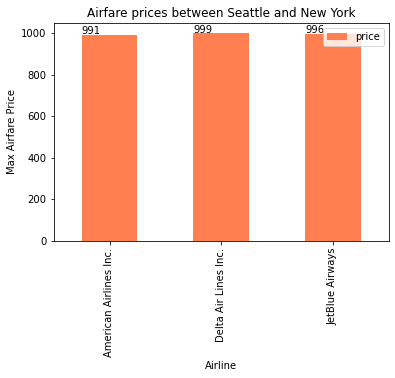

In [34]:
# create DataFrame and plot barchart from aggregation of max_price by airline
df = pd.DataFrame(max_p)
bar_chart = df.plot(kind='bar', y='price', color='coral', 
                    title='Max Airfare prices between Seattle and New York by Airline', legend=True)
plt.xlabel('Airline')
plt.ylabel('Max Airfare Price')
for p in bar_chart.patches:
    bar_chart.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

In [8]:
# filter down flights to those Leaving from Seattle and arriving in Boston, MA
sea_bst = flights[(flights.origin_city == 'Seattle WA') & (flights.dest_city == 'Boston MA')]

# Join carriers name from carriers table to carrier_id in sea_bst flights table
carriers_2 = sea_bst.merge(carriers[['cid', 'name']], left_on='carrier_id', right_on='cid', how='left')

# filter down flights from Seattle to Boston on Alaska Airlines Inc. airline.
alk_bst = carriers_2[(carriers_2.name == 'Alaska Airlines Inc.')]

# Join weekday name from weekdays table to week_id in alk_bst flights table
wk_day = alk_bst.merge(weekdays[['did', 'day_of_week']], left_on='day_of_week_id', right_on='did', how='left')

# Find the average price of airfare by day of week
avg = wk_day.groupby(['did','day_of_week'])['price'].mean()

### Average Price of Flights from Seattle to Boston by Weekday
The average cost of a flight from Seattle to Boston varies greatly by weekday vs weekend. The cheapest day to fly to Boston in Monday with an average airfare of $\$$519.20 whereas the most expensive day to fly to Boston is Saturday with an average airfare of $\$$725.16

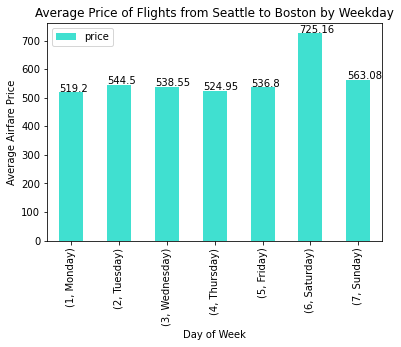

In [35]:
# Create DataFrame and barchart for average price of flights by weekday
df_2 = pd.DataFrame(avg)
bar_chart2 = df_2.plot(kind='bar', y='price', color='turquoise', 
                       title='Average Price of Flights from Seattle to Boston by Weekday', legend=True)
plt.xlabel('Day of Week')
plt.ylabel('Average Airfare Price')
for p in bar_chart2.patches:
    bar_chart2.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

### Distance vs Time :: Flights from Seattle

While I understand the desire to get very far away from here in as little time as possible given the
current local and global environment, I would suggest taking into consideration other factors besides distance and travel time
such as price and average delay of departure. 

Distance and Travel time follow a nearly linear pattern so I recommend finding destinations that
fall more often below the trend line, rather than above. The Hawaiian destinations of Kahului, Honolulu, Kona, and Lihue
sound like perfect get-aways but are more frequently above the trend line and therefore have longer travel times than other
destinations with similar distance. 
I would suggest destionations such as Omaha, Kansas City, Cleavland, or even Pittsburgh for their above average 
travel time to distance ratio proving a traveler the most miles for their time. 
However, if one is looking for a relaxing getaway I do not believe you will find tranquil ocean scenery or 
beautiful secluded wilderness that one may be looking for during this time of crisis. 

Instead, I highly recommend the destinations of Orlando, Tennesse, and New Orleans. These destinations offer not only
a very strong average travel time to distance ratio, but they are also below average on price and therefore offer the greatest
value for travelers. I do urge you to await until the pandemic is over before traveling so that we can all get 
through this soon. "We got this Seattle"

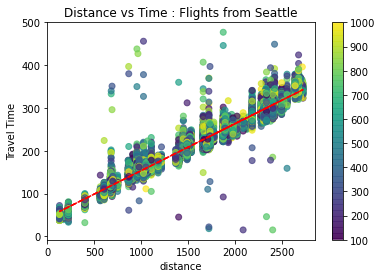

In [36]:
# Filter down flights table to those departing from Seattle & remove invalid data points
# Create Scatter plot and trendline
from_seattle = flights[(flights.origin_city == 'Seattle WA') & (flights.actual_time > 0)]

x = from_seattle.distance
y = from_seattle.actual_time
t = from_seattle.price
plt.scatter(x,y, alpha=0.7, c=t)
plt.xlabel('distance')
plt.ylabel('Travel Time')
plt.title('Distance vs Time : Flights from Seattle')

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x), "r--")

plt.colorbar()